In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the data
data = pd.read_csv('promptCount(AllData).csv', delimiter=';')

print(data.head())

         Exam Set With AI Participant  Task 1 Task 2 Task 3  Task 4  Task 5  \
0  Advertisements     Yes      Philip  107, 1  91, 1  69, 1  114, 1  146, 1   
1          Robots      No      Philip     122    157     76     131     235   
2  Advertisements     Yes      Mattej     149    138    199  404, 2  107, 1   
3          Robots      No      Mattej     126     96     58     207     125   
4  Advertisements     Yes    Micheala  106, 1   5, 1  98, 1  114, 1   94, 1   

  Task 6 Task 7 Task 8 Task 9  
0  58, 1  96, 1    NaN    NaN  
1     42    224    421      4  
2    330    338    NaN    NaN  
3     40    277    506    163  
4  54, 1    NaN    NaN    NaN  


In [85]:
# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            if ',' in task:
                time_str, _ = task.split(',')
                total_time += int(time_str)
            else:
                total_time += int(task)  # Handle case where there's only a time value
    return total_time

# Define a function to calculate total prompt count
def calculate_total_prompt(row):
    total_prompt = 0
    for task in row:
        if isinstance(task, str) and ',' in task:
            _, prompt_str = task.split(',')
            total_prompt += int(prompt_str)
    return total_prompt

# Calculate total time spent and total prompt count for each row
data['Total_Time'] = data.iloc[:, 3:].apply(calculate_total_time, axis=1)
data['Total_Prompt_Count'] = data.iloc[:, 3:].apply(calculate_total_prompt, axis=1)
data['Total_Time_Minutes'] = (data['Total_Time'] / 60).round(0)

# Print the DataFrame with the added columns
print(data.head())


         Exam Set With AI Participant  Task 1 Task 2 Task 3  Task 4  Task 5  \
0  Advertisements     Yes      Philip  107, 1  91, 1  69, 1  114, 1  146, 1   
1          Robots      No      Philip     122    157     76     131     235   
2  Advertisements     Yes      Mattej     149    138    199  404, 2  107, 1   
3          Robots      No      Mattej     126     96     58     207     125   
4  Advertisements     Yes    Micheala  106, 1   5, 1  98, 1  114, 1   94, 1   

  Task 6 Task 7 Task 8 Task 9  Total_Time  Total_Prompt_Count  \
0  58, 1  96, 1    NaN    NaN         681                   7   
1     42    224    421      4        1412                   0   
2    330    338    NaN    NaN        1665                   3   
3     40    277    506    163        1598                   0   
4  54, 1    NaN    NaN    NaN         471                   6   

   Total_Time_Minutes  
0                11.0  
1                24.0  
2                28.0  
3                27.0  
4             

In [86]:
# Robots with AI
robots_with_ai = data[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'Yes')].iloc[:, 3:12]

# Robots without AI
robots_without_ai = data[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'No')].iloc[:, 3:12]

# Advertisements with AI
ads_with_ai = data[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'Yes')].iloc[:, 3:10]

# Advertisements without AI
ads_without_ai = data[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'No')].iloc[:, 3:10]



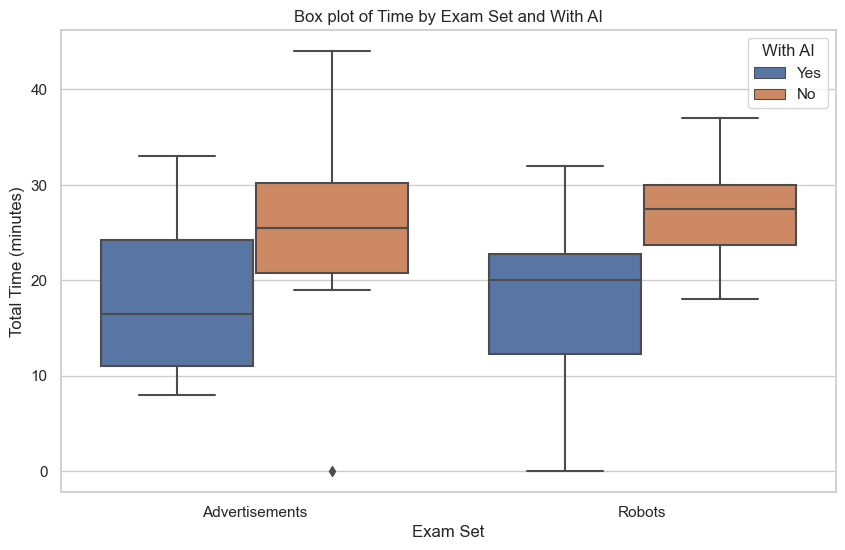

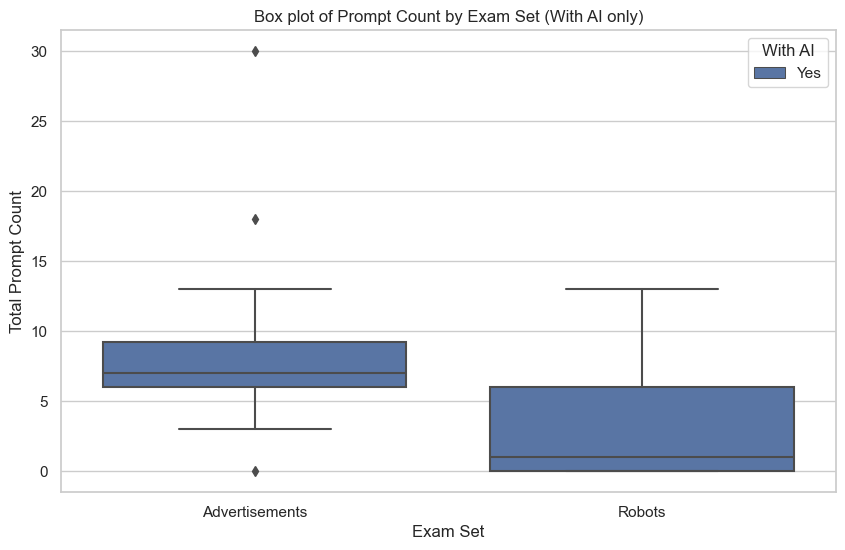

In [89]:
# Filter the DataFrame to include only rows where 'With AI' is 'Yes' or 'No'
data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

# Create box plots for time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Time_Minutes', hue='With AI', data=data_filtered)
plt.title('Box plot of Time by Exam Set and With AI')
plt.xlabel('Exam Set')
plt.ylabel('Total Time (minutes)')
plt.show()

# Create box plots for prompt count for exams with AI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Prompt_Count', hue='With AI', data=data[data['With AI'] == 'Yes'])
plt.title('Box plot of Prompt Count by Exam Set (With AI only)')
plt.xlabel('Exam Set')
plt.ylabel('Total Prompt Count')
plt.show()



In [118]:
# Function to calculate average time spent per task
def calculate_average_time(row):
    total_time = 0
    total_cells = 0
    for task in row:
        if isinstance(task, str):
            if ',' in task:
                time_str, _ = task.split(',')
                total_time += int(time_str)
                total_cells += 1
            else:
                total_time += int(task)  # Handle case where there's only a time value
                total_cells += 1
    if total_cells == 0:
        return 0
    else:
        return total_time / (total_cells * 60)  # Convert to minutes

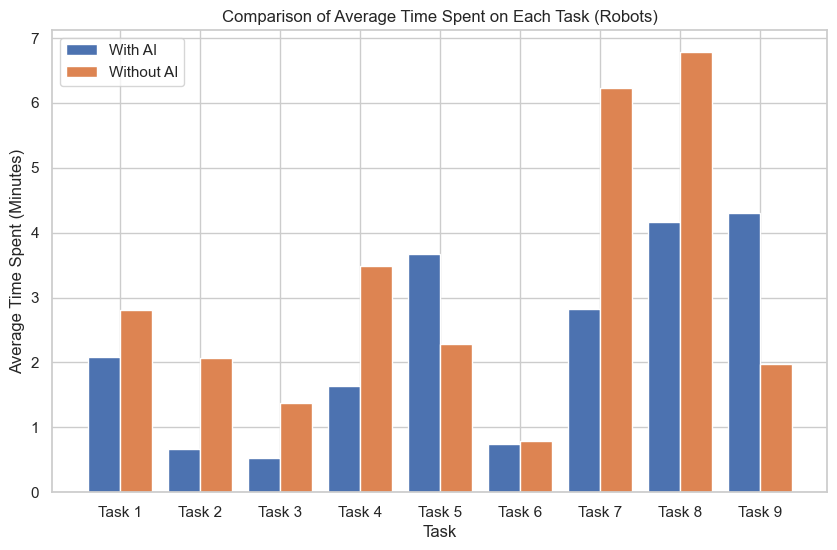

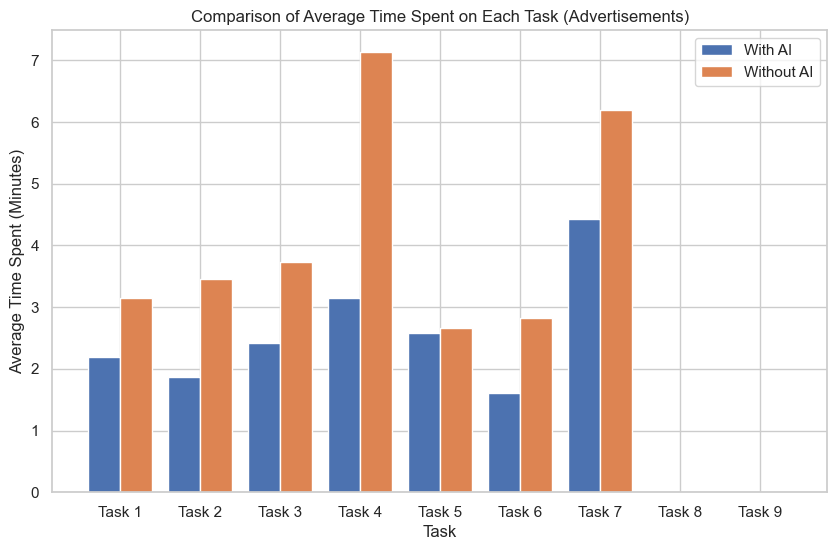

In [102]:
# Apply the function to calculate average time spent per task for both sets
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

# Extract task names
task_names = [f'Task {i}' for i in range(1, 10)]

# Plot for Robots
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_robots, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_robots, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Robots)')
plt.xticks(range(1, 10), task_names)
plt.legend()
plt.show()

# Plot for Advertisements
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_ads, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_ads, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Advertisements)')
plt.xticks(range(1, 10), task_names)
plt.legend()
plt.show()

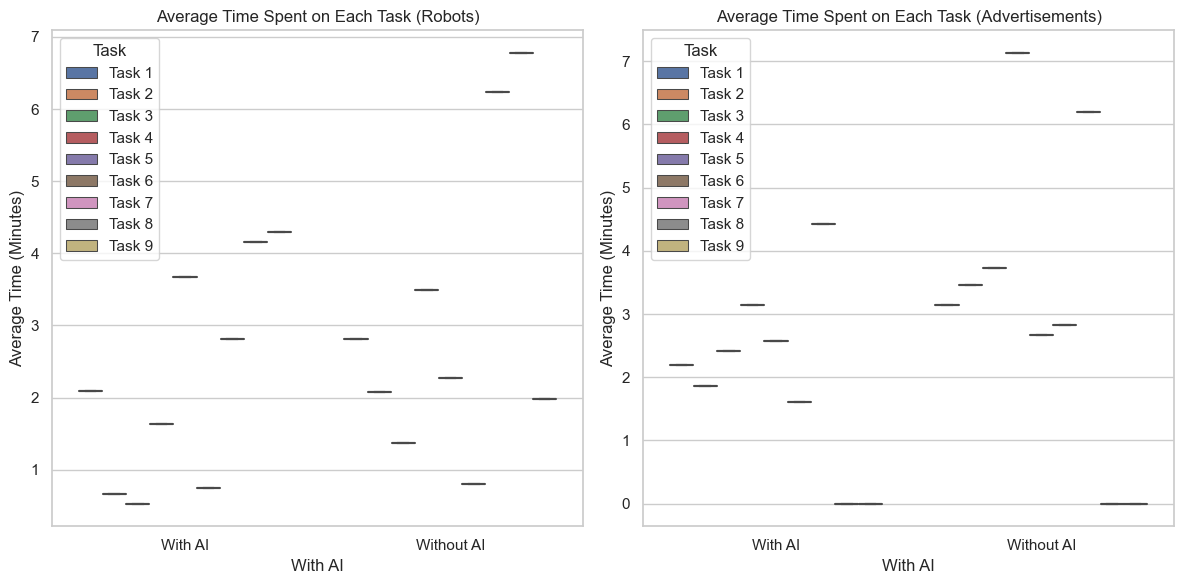

In [121]:
# Apply the function to calculate average time spent per task for both sets
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

# Convert the data to long format for plotting
avg_time_robots = pd.concat([avg_time_with_ai_robots, avg_time_without_ai_robots], axis=1)
avg_time_robots.columns = ['With AI', 'Without AI']
avg_time_robots['Task'] = [f'Task {i}' for i in range(1, 10)]
melted_avg_time_robots = avg_time_robots.melt(id_vars='Task', var_name='AI', value_name='Average Time (Minutes)')

avg_time_ads = pd.concat([avg_time_with_ai_ads, avg_time_without_ai_ads], axis=1)
avg_time_ads.columns = ['With AI', 'Without AI']
avg_time_ads['Task'] = [f'Task {i}' for i in range(1, 10)]
melted_avg_time_ads = avg_time_ads.melt(id_vars='Task', var_name='AI', value_name='Average Time (Minutes)')

# Create box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='AI', y='Average Time (Minutes)', hue='Task', data=melted_avg_time_robots)
plt.title('Average Time Spent on Each Task (Robots)')
plt.xlabel('With AI')
plt.ylabel('Average Time (Minutes)')
plt.subplot(1, 2, 2)
sns.boxplot(x='AI', y='Average Time (Minutes)', hue='Task', data=melted_avg_time_ads)
plt.title('Average Time Spent on Each Task (Advertisements)')
plt.xlabel('With AI')
plt.ylabel('Average Time (Minutes)')
plt.tight_layout()
plt.show()

In [122]:
# Calculate the total time spent for each category
total_time_with_ai_robots = robots_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_robots = robots_without_ai['Total_Time_Minutes'].sum()

total_time_with_ai_ads = ads_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_ads = ads_without_ai['Total_Time_Minutes'].sum()

# Calculate the percentage difference for each category
percent_difference_robots = (((total_time_without_ai_robots - total_time_with_ai_robots) / total_time_with_ai_robots) * 100).round(2)
percent_difference_ads = (((total_time_without_ai_ads - total_time_with_ai_ads) / total_time_with_ai_ads) * 100).round(2)

# Print the results
print("Total time spent on Robots without AI:", total_time_without_ai_robots, "minutes")
print("Total time spent on Robots with AI:", total_time_with_ai_robots, "minutes")
print("Total time used on tasks without AI in Robots are", percent_difference_robots, "% longer than with AI")

print("\nTotal time spent on Advertisements without AI:", total_time_without_ai_ads, "minutes")
print("Total time spent on Advertisements with AI:", total_time_with_ai_ads, "minutes")
print("Total time used on tasks without AI in Advertisements are", percent_difference_ads, "% longer than with AI")



Total time spent on Robots without AI: 322.0 minutes
Total time spent on Robots with AI: 177.0 minutes
Total time used on tasks without AI in Robots are 81.92 % longer than with AI

Total time spent on Advertisements without AI: 249.0 minutes
Total time spent on Advertisements with AI: 215.0 minutes
Total time used on tasks without AI in Advertisements are 15.81 % longer than with AI
